In [3]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)
with open("dataset.txt", "wb") as f:
    f.write(r.content)
import pandas as pd
data = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)
columns = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])
with open("df.csv", "w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))
df = pd.read_csv("df.csv")
df.columns = columns
df["t_win"] = df.round_winner.astype("category").cat.codes
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+['t_win']].drop(['map'], axis=1).drop(['round_winner'], axis=1).corr()
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

selected_columns = []

for col in columns+['t_win']:
    try:
        if abs(correlations[col]['t_win']) > 0.11:
            selected_columns.append(col)
    except KeyError:
        pass

df_selected = df[selected_columns]

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

0.18710090782092895


<Axes: >

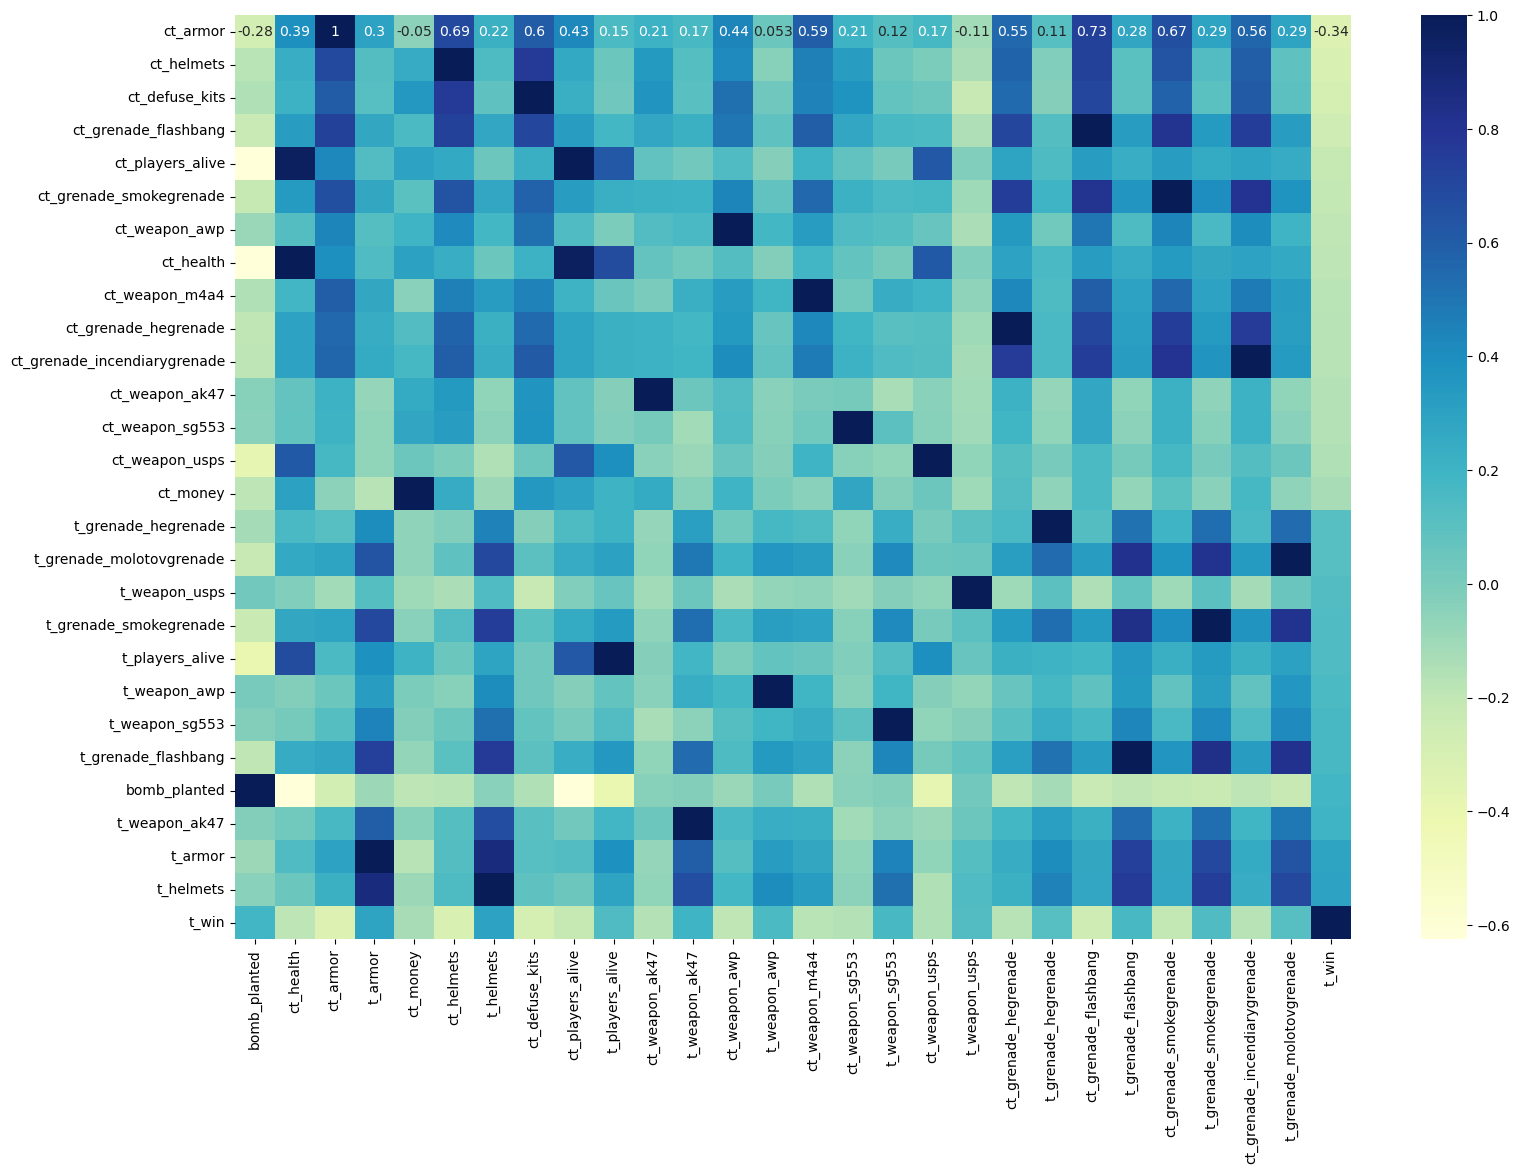

In [4]:
print(correlations['bomb_planted']['t_win'])

plt.figure(figsize=(18, 12))
sns.heatmap(df_selected.corr().sort_values(by='t_win'), annot=True, cmap="YlGnBu")

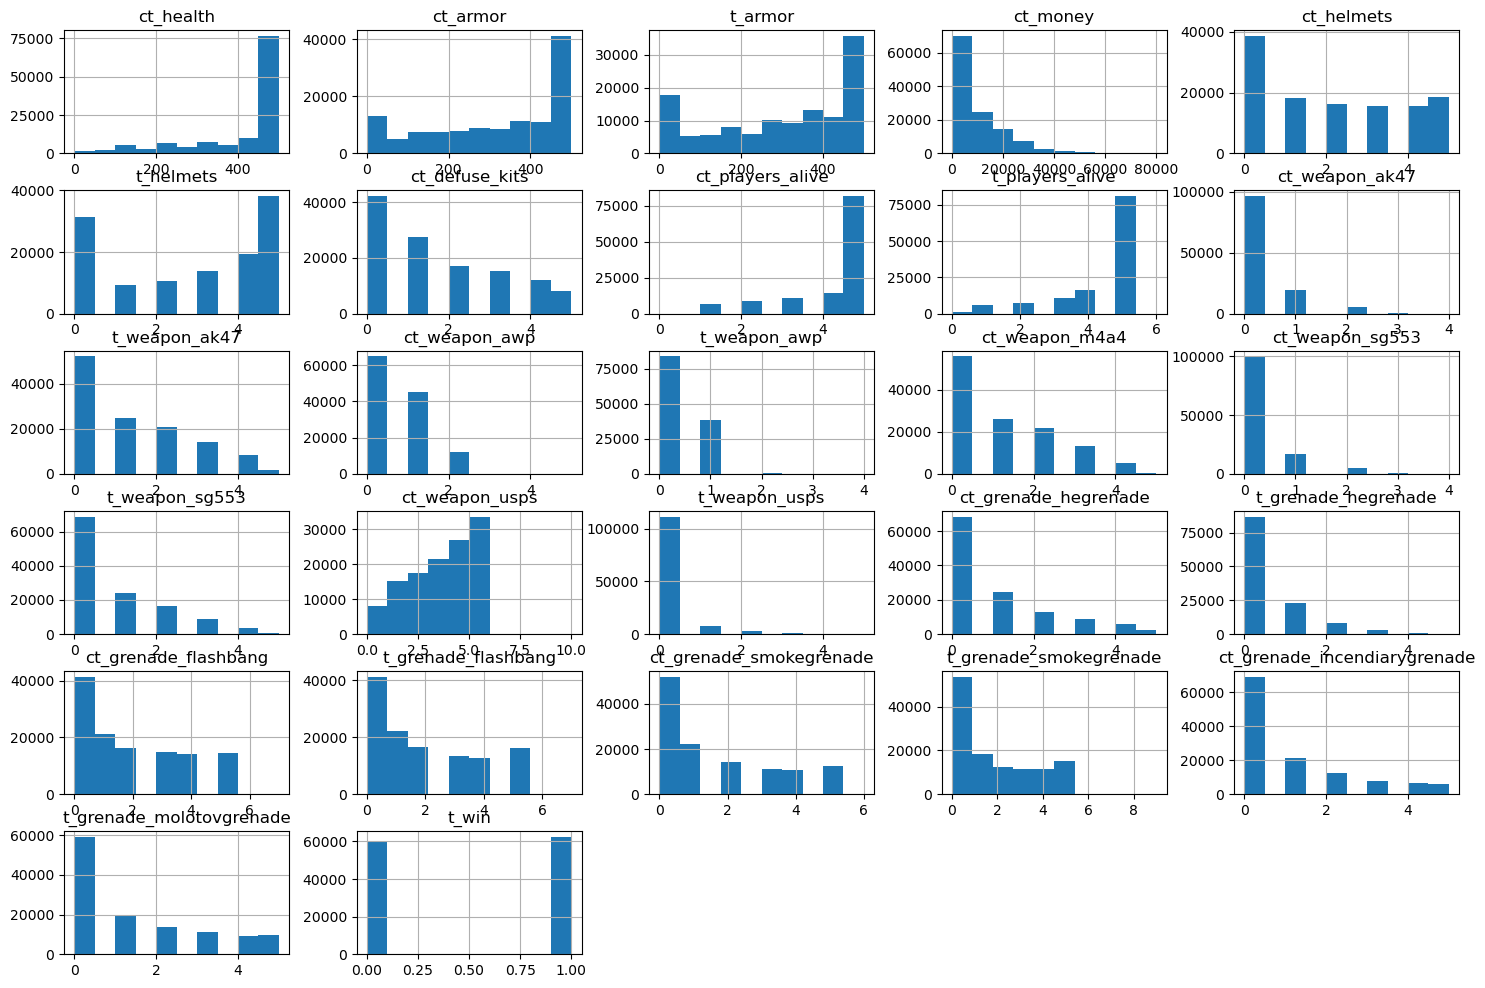

In [5]:
df_selected.hist(figsize=(18, 12))
plt.savefig("histo.png")

In [6]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bomb_planted                  122410 non-null  bool   
 1   ct_health                     122410 non-null  float64
 2   ct_armor                      122410 non-null  float64
 3   t_armor                       122410 non-null  float64
 4   ct_money                      122410 non-null  float64
 5   ct_helmets                    122410 non-null  float64
 6   t_helmets                     122410 non-null  float64
 7   ct_defuse_kits                122410 non-null  float64
 8   ct_players_alive              122410 non-null  float64
 9   t_players_alive               122410 non-null  float64
 10  ct_weapon_ak47                122410 non-null  float64
 11  t_weapon_ak47                 122410 non-null  float64
 12  ct_weapon_awp                 122410 non-nul

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split

X, y = df_selected.drop(["t_win"], axis=1), df_selected["t_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1)

forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [11]:
forest.score(X_test_scaled, y_test)

0.8489094028265665

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled, y_train are already prepared
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Fit the classifier
logreg_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
test_accuracy = logreg_classifier.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.748345723388612


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled, y_train are already prepared
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier
gb_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
test_accuracy = gb_classifier.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7556980638836697


In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled, y_train are already prepared
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC()

# Fit the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
test_accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.7610897802467119


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled, y_train are already prepared
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
test_score = grid_search.score(X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Test Score:", test_score)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Score: 0.8485826321378972
